In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random as rng

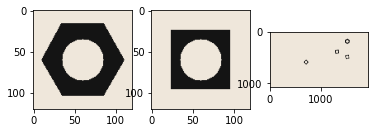

In [2]:

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [5]:
hexnut_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

ret_hexnut,th_hexnut = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret_squarenut,th_squarenut = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret_f100,th_f100 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print("Threshold for hexnut:",ret_hexnut)
print("Threshold for squarenut:",ret_squarenut)
print("Threshold for conveyor belt image :",ret_f100)

Threshold for hexnut: 20.0
Threshold for squarenut: 20.0
Threshold for conveyor belt image : 20.0


Text(0.5, 1.0, 'After removing small holes')

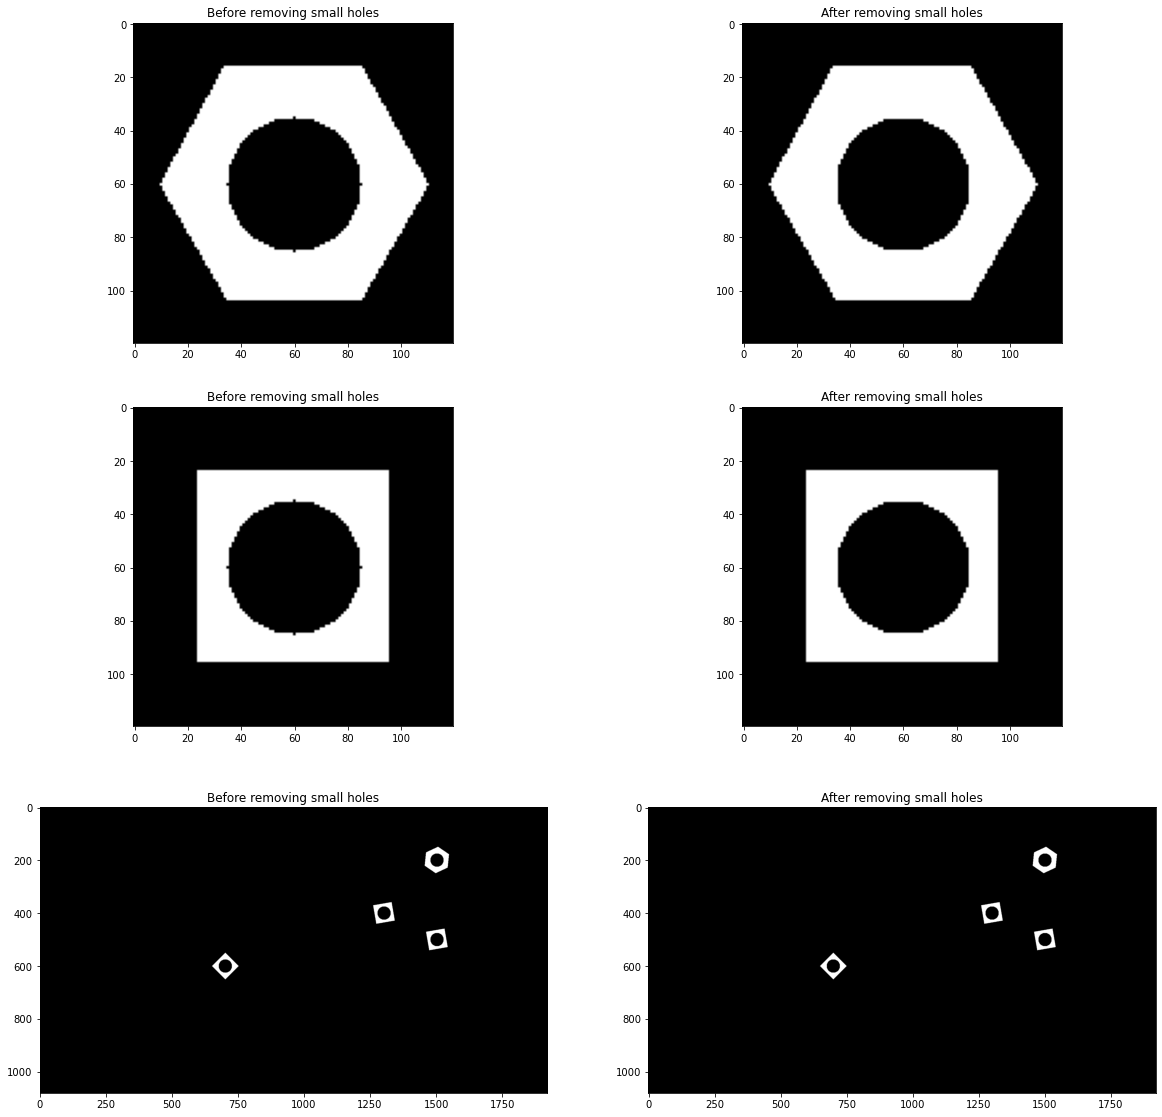

In [6]:
kernel= cv.getStructuringElement(cv.MORPH_RECT,(3,3))

hexnut_closing = cv.morphologyEx(th_hexnut, cv.MORPH_CLOSE, kernel)
squarenut_closing = cv.morphologyEx(th_squarenut, cv.MORPH_CLOSE, kernel)
f100_closing = cv.morphologyEx(th_f100, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(3,2,figsize = (20,20))

ax[0][0].imshow(cv.cvtColor(th_hexnut, cv.COLOR_RGB2BGR))
ax[0][0].set_title("Before removing small holes")
ax[0][1].imshow(cv.cvtColor(hexnut_closing, cv.COLOR_RGB2BGR))
ax[0][1].set_title("After removing small holes")

ax[1][0].imshow(cv.cvtColor(th_squarenut, cv.COLOR_RGB2BGR))
ax[1][0].set_title("Before removing small holes")
ax[1][1].imshow(cv.cvtColor(squarenut_closing, cv.COLOR_RGB2BGR))
ax[1][1].set_title("After removing small holes")

ax[2][0].imshow(cv.cvtColor(th_f100, cv.COLOR_RGB2BGR))
ax[2][0].set_title("Before removing small holes")
ax[2][1].imshow(cv.cvtColor(f100_closing, cv.COLOR_RGB2BGR))
ax[2][1].set_title("After removing small holes")

In [7]:
connectivity = 8  

output = cv.connectedComponentsWithStats(f100_closing, connectivity, cv.CV_32S)
# output = cv.connectedComponentsWithStats(hexnut_closing, connectivity, cv.CV_32S)
# output = cv.connectedComponentsWithStats(squarenut_closing, connectivity, cv.CV_32S)

num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

print(num_labels)
print(stats )
print(centroids)


# componentMask = output(labels == 1).astype("uint8") * 255
# 	# show our output image and connected component mask
# plt.imshow("Output", output)
# plt.imshow("Connected Component", componentMask)
	# cv2.waitKey(0)

5
[[      0       0    1920    1080 2059646]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3087]
 [   1459     459      82      82    3087]
 [    650     550     101     101    3144]]
[[ 957.36323524  540.44416273]
 [1499.24201898  199.28515962]
 [1299.18302559  399.18302559]
 [1499.18302559  499.18302559]
 [ 700.          600.        ]]


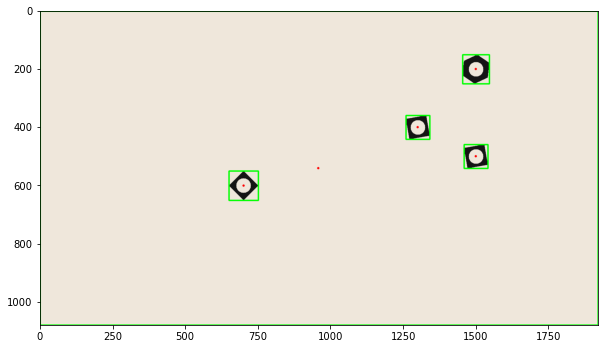

In [8]:
output = conveyor_f100.copy()
# output = hexnut_template.copy()
# output = squarenut_template.copy()

for i in range(0, num_labels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	x = stats[i, cv.CC_STAT_LEFT]
	y = stats[i, cv.CC_STAT_TOP]
	w = stats[i, cv.CC_STAT_WIDTH]
	h = stats[i, cv.CC_STAT_HEIGHT]
	area = stats[i, cv.CC_STAT_AREA]
	(cX, cY) = centroids[i]
	cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))

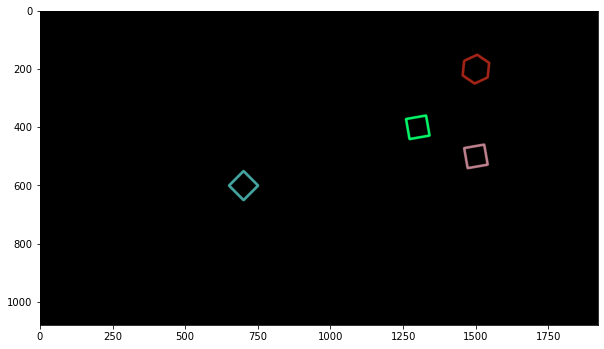

In [21]:
drawing = np.zeros((f100_closing.shape[0],contours, hierarchy = cv.findContours(f100_closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) f100_closing.shape[1], 3), dtype=np.uint8)
contours, hierarchy = cv.findContours(f100_closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing, contours, i, color, 7, cv.LINE_8, hierarchy, 0)

plt.figure(figsize=(10,10))
plt.imshow(drawing)

In [26]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [23]:
hex_contours, hex_hierarchy = cv.findContours(hexnut_closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnt1 = hex_contours[0]
print( cv.contourArea(cnt1))

count = 0

for i in range (0,len(contours)):
    cnt2 = contours[i]
    ret = cv.matchShapes(cnt1,cnt2,1,0.0)
    if ret<0.005:
        count+=1
print(count)


6546.5
1
8.228790019826349e-05


In [28]:
def process(frame,kernel):
    frame_gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    ret,th = cv.threshold(frame_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    frame_closing = cv.morphologyEx(th, cv.MORPH_CLOSE, kernel)
    return frame_closing

In [64]:
# Writing the video

frame_array = []
shape = (1080, 1920, 3)

cap = cv.VideoCapture('conveyor.mp4')
f = 0      
total_count = 0
prev_count = 0
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    f += 1
    count = 0
    processed_frame = process(frame,kernel)
    
    fcontours, fhierarchy = cv.findContours(processed_frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    for i in range (0,len(fcontours)):
        cnti = fcontours[i]
        area = cv.contourArea(cnti)
        ret = cv.matchShapes(cnt1,cnti,1,0.0)
        if ret<0.0005 and area>6400:
            cv.drawContours(frame, fcontours, i,(0,0,255), 7, cv.LINE_8, hierarchy, 0)
            count+=1
          
    if count > prev_count:
        total_count = total_count+(count-prev_count)  
    prev_count = count
    text = 'Frame:' + str(f) +" Objects in Frame: "+str(count) + " Total no. of Objects: "+str(total_count)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    frame_array.append(frame)
    if cv.waitKey(1) == ord('q'):  
        break


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    # cv.waitKey()
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
